# Evaluate model output

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [3]:
datasets = [
    "genetic_ko",
    "primary",
    "rep1m",
    "secondary_screen"
]

model_types = [
    "linear_model",
    "quantile_regression",
    "random_forest",
    "xgboost_model"
]

test_preds_path = "all_test_predictions.csv"
perf_path = "model_performance_summary.csv"
feature_path = "feature_importance/feature_importance.csv"
output_root = "/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/full"

def load_test_preds(dataset, model_type):
    files = glob(os.path.join(output_root, dataset, "*", model_type, test_preds))
    dfs = []
    for file in tqdm(files):
        dfs.append(pd.read_csv(file))
    df = pd.concat(dfs)
    df["model_type"] = model_type
    df["dataset"] = dataset
    return df

def load_perf(dataset, model_type):
    files = glob(os.path.join(output_root, dataset, "*", model_type, perf_path))
    dfs = []
    for file in tqdm(files):
        dfs.append(pd.read_csv(file))
    df = pd.concat(dfs)
    df["model_type"] = model_type
    df["dataset"] = dataset
    df = df.loc[df.fold == "overall"]
    return df

def load_feature_df(dataset, model_type):
    files = glob(os.path.join(output_root, dataset, "*", model_type, feature_path))
    dfs = []
    for file in tqdm(files):
        tmp = pd.read_csv(file)
        run_name = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(file))))
        tmp["name"] = run_name
        dfs.append(tmp)
    df = pd.concat(dfs)
    df["model_type"] = model_type
    df["dataset"] = dataset
    return df

In [4]:
all_perfs = []
for dataset in datasets:
    print(f"Loading {dataset}...")
    for model_type in model_types:
        print(f"Loading {model_type}...")
        perf = load_perf(dataset, model_type)
        all_perfs.append(perf)
perf_df = pd.concat(all_perfs)

Loading genetic_ko...
Loading linear_model...


100%|██████████| 2018/2018 [00:45<00:00, 44.47it/s]


Loading quantile_regression...


100%|██████████| 2018/2018 [00:47<00:00, 42.63it/s]


Loading random_forest...


100%|██████████| 2017/2017 [01:01<00:00, 32.73it/s]


Loading xgboost_model...


100%|██████████| 2018/2018 [00:56<00:00, 35.74it/s]


Loading primary...
Loading linear_model...


100%|██████████| 4685/4685 [01:41<00:00, 46.09it/s]


Loading quantile_regression...


100%|██████████| 4685/4685 [01:47<00:00, 43.63it/s]


Loading random_forest...


100%|██████████| 4685/4685 [01:45<00:00, 44.38it/s]


Loading xgboost_model...


100%|██████████| 4685/4685 [01:49<00:00, 42.93it/s]


Loading rep1m...
Loading linear_model...


100%|██████████| 1590/1590 [00:33<00:00, 47.84it/s]


Loading quantile_regression...


100%|██████████| 1590/1590 [00:35<00:00, 45.09it/s]


Loading random_forest...


100%|██████████| 1590/1590 [00:28<00:00, 55.59it/s]


Loading xgboost_model...


100%|██████████| 1590/1590 [00:34<00:00, 45.69it/s]


Loading secondary_screen...
Loading linear_model...


100%|██████████| 1451/1451 [00:30<00:00, 46.94it/s]


Loading quantile_regression...


100%|██████████| 1451/1451 [00:34<00:00, 42.31it/s]


Loading random_forest...


100%|██████████| 1451/1451 [00:29<00:00, 48.58it/s]


Loading xgboost_model...


100%|██████████| 1451/1451 [00:28<00:00, 51.16it/s]


In [5]:
perf_df.to_csv("all_model_performance.csv", index=False)

In [6]:
perf_df

,fold,val_rmse,val_r2,val_pearson,test_rmse,test_r2,test_pearson,drug_name,response_name,model_type,dataset
10,overall,0.385592,-0.002228,-0.044009,0.388411,-0.000731,-0.018941,ANAPC11,ANAPC11,linear_model,genetic_ko
10,overall,0.278865,0.248002,0.498529,0.286354,0.203840,0.457611,ARHGEF7,ARHGEF7,linear_model,genetic_ko
10,overall,0.337867,0.014605,0.189548,0.337278,0.010999,0.182172,ATP5ME,ATP5ME,linear_model,genetic_ko
10,overall,0.260408,0.033658,0.196291,0.269940,-0.027108,0.099030,BDP1,BDP1,linear_model,genetic_ko
10,overall,0.335452,0.007944,0.139632,0.328186,0.000689,0.123804,CCNA2,CCNA2,linear_model,genetic_ko
...,...,...,...,...,...,...,...,...,...,...,...
10,overall,0.148779,-0.067710,0.041311,0.149929,-0.106998,0.021739,dichloroacetate,BRD-M97302542-001-03-6,xgboost_model,secondary_screen
10,overall,0.204654,-0.078183,0.075951,0.212995,-0.101565,0.039736,ammonium_lactate,BRD-M29182745-001-01-4,xgboost_model,secondary_screen
10,overall,0.281824,-0.098660,0.046080,0.276368,-0.044744,0.119878,linifanib,BRD-K99749624-001-07-0,xgboost_model,secondary_screen
10,overall,0.233485,-0.039656,0.103529,0.233200,-0.004482,0.165651,nemonapride,BRD-M80207679-001-01-5,xgboost_model,secondary_screen


# Compare Pearson Correlations

In [7]:
from scipy import stats
from scipy.stats import mannwhitneyu
import matplotlib.patches as mpatches

def plot_test_pearson_by_model(df, figsize=(12, 6), dataset_filter=None):
    """
    Plot distribution of test_pearson by model_type, ordered by median.
    Performs statistical tests between adjacent groups.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing 'test_pearson' and 'model_type' columns
    figsize : tuple
        Figure size (width, height)
    dataset_filter : str or None
        If provided, filter to only this dataset
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    
    # Filter data if dataset specified
    if dataset_filter:
        plot_df = df[df['dataset'] == dataset_filter].copy()
        title_suffix = f" - {dataset_filter}"
    else:
        plot_df = df.copy()
        title_suffix = " - All Datasets"
    
    # Calculate median test_pearson for each model_type and sort
    median_scores = plot_df.groupby('model_type')['test_pearson'].median().sort_values()
    ordered_models = median_scores.index.tolist()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create box plot with ordered model types
    box_data = [plot_df[plot_df['model_type'] == model]['test_pearson'].dropna() 
                for model in ordered_models]
    
    bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)
    
    # Color the boxes
    colors = plt.cm.viridis(np.linspace(0, 1, len(ordered_models)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Perform statistical tests between adjacent groups
    p_values = []
    for i in range(len(ordered_models) - 1):
        group1 = plot_df[plot_df['model_type'] == ordered_models[i]]['test_pearson'].dropna()
        group2 = plot_df[plot_df['model_type'] == ordered_models[i+1]]['test_pearson'].dropna()
        
        # Mann-Whitney U test (one-tailed: group2 > group1)
        statistic, p_value = mannwhitneyu(group1, group2, alternative='less')
        p_values.append(p_value)
    
    # Add significance annotations
    y_max = plot_df['test_pearson'].max()
    y_range = plot_df['test_pearson'].max() - plot_df['test_pearson'].min()
    
    for i, p_val in enumerate(p_values):
        # Position for annotation line
        x1, x2 = i + 1, i + 2
        y = y_max + 0.05 * y_range + (i * 0.03 * y_range)
        
        # Draw line
        ax.plot([x1, x2], [y, y], 'k-', linewidth=1)
        
        # Add significance text
        if p_val < 0.001:
            sig_text = '***'
        elif p_val < 0.01:
            sig_text = '**'
        elif p_val < 0.05:
            sig_text = '*'
        else:
            sig_text = 'ns'
        
        ax.text((x1 + x2) / 2, y + 0.01 * y_range, sig_text, 
                ha='center', va='bottom', fontsize=10)
    
    # Customize plot
    ax.set_xlabel('Model Type', fontsize=12)
    ax.set_ylabel('Test Pearson Correlation', fontsize=12)
    ax.set_title(f'Distribution of Test Pearson Correlation by Model Type{title_suffix}', 
                 fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')
    
    # Add median values as text
    for i, model in enumerate(ordered_models):
        median_val = median_scores[model]
        ax.text(i + 1, median_val, f'{median_val:.3f}', 
                ha='center', va='center', fontweight='bold', 
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
    
    # Add legend for significance levels
    legend_elements = [
        mpatches.Patch(color='none', label='Significance levels:'),
        mpatches.Patch(color='none', label='*** p < 0.001'),
        mpatches.Patch(color='none', label='** p < 0.01'),
        mpatches.Patch(color='none', label='* p < 0.05'),
        mpatches.Patch(color='none', label='ns: not significant')
    ]
    ax.legend(handles=legend_elements, loc='upper left', frameon=True)
    
    plt.tight_layout()
    
    # Print summary statistics
    print("Median Test Pearson Correlation by Model Type:")
    print("-" * 50)
    for model in ordered_models:
        median_val = median_scores[model]
        n_samples = len(plot_df[plot_df['model_type'] == model])
        print(f"{model:20s}: {median_val:.4f} (n={n_samples})")
    
    print(f"\nPairwise comparisons (Mann-Whitney U test, one-tailed):")
    print("-" * 50)
    for i, p_val in enumerate(p_values):
        print(f"{ordered_models[i]} < {ordered_models[i+1]}: p = {p_val:.4e}")
    
    return fig, ax


/tmp/ipykernel_215577/3715601648.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)


Median Test Pearson Correlation by Model Type:
--------------------------------------------------
linear_model        : 0.0068 (n=9744)
quantile_regression : 0.0571 (n=9744)
xgboost_model       : 0.0815 (n=9744)
random_forest       : 0.0837 (n=9743)

Pairwise comparisons (Mann-Whitney U test, one-tailed):
--------------------------------------------------
linear_model < quantile_regression: p = 5.2671e-124
quantile_regression < xgboost_model: p = 4.0497e-65
xgboost_model < random_forest: p = 1.0737e-01


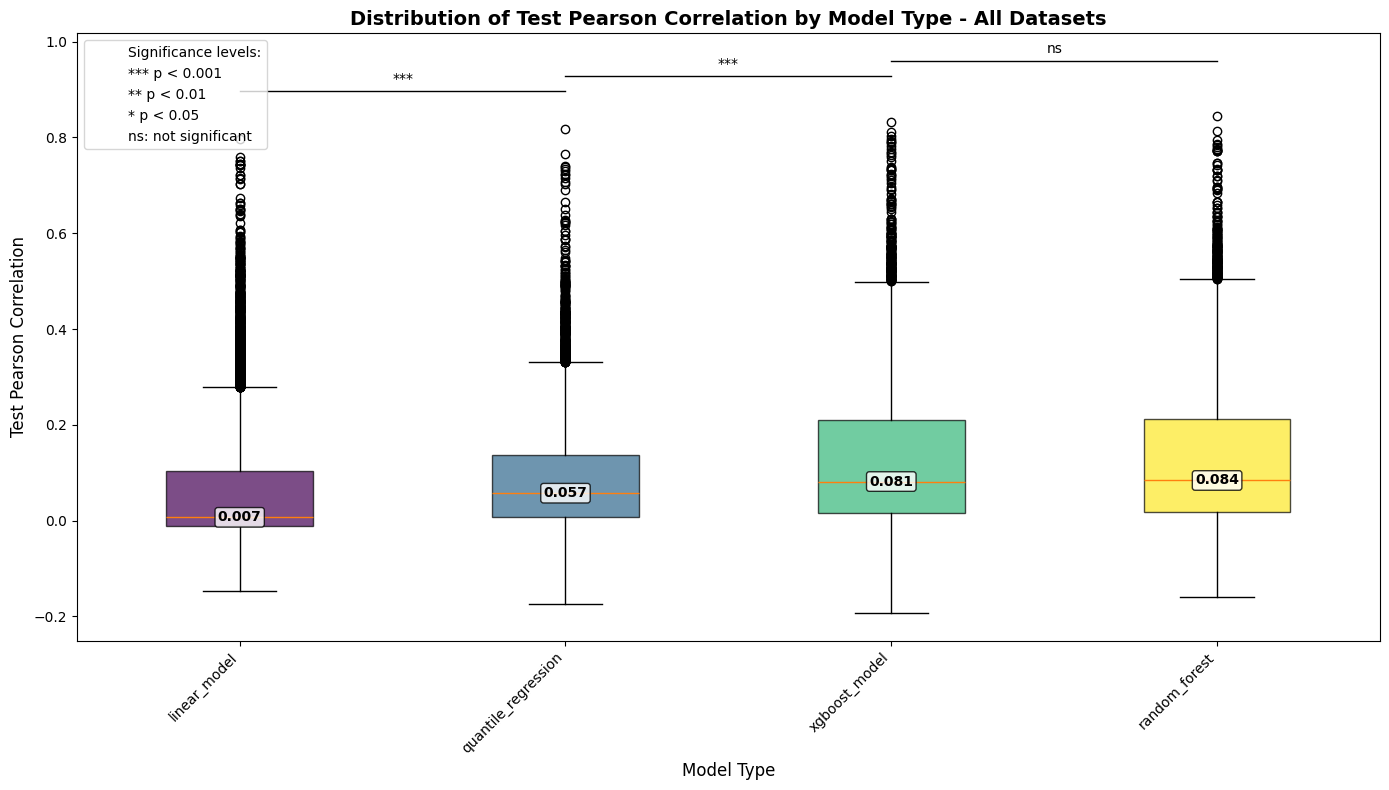

In [8]:
# Example usage: Plot for all datasets combined
fig, ax = plot_test_pearson_by_model(perf_df, figsize=(14, 8))
plt.show()



Dataset: genetic_ko
Median Test Pearson Correlation by Model Type:
--------------------------------------------------
linear_model        : 0.1491 (n=2018)
quantile_regression : 0.1663 (n=2018)
random_forest       : 0.2597 (n=2017)
xgboost_model       : 0.2612 (n=2018)

Pairwise comparisons (Mann-Whitney U test, one-tailed):
--------------------------------------------------
linear_model < quantile_regression: p = 7.3549e-10
quantile_regression < random_forest: p = 5.2893e-138
random_forest < xgboost_model: p = 5.5444e-01


/tmp/ipykernel_215577/3715601648.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)


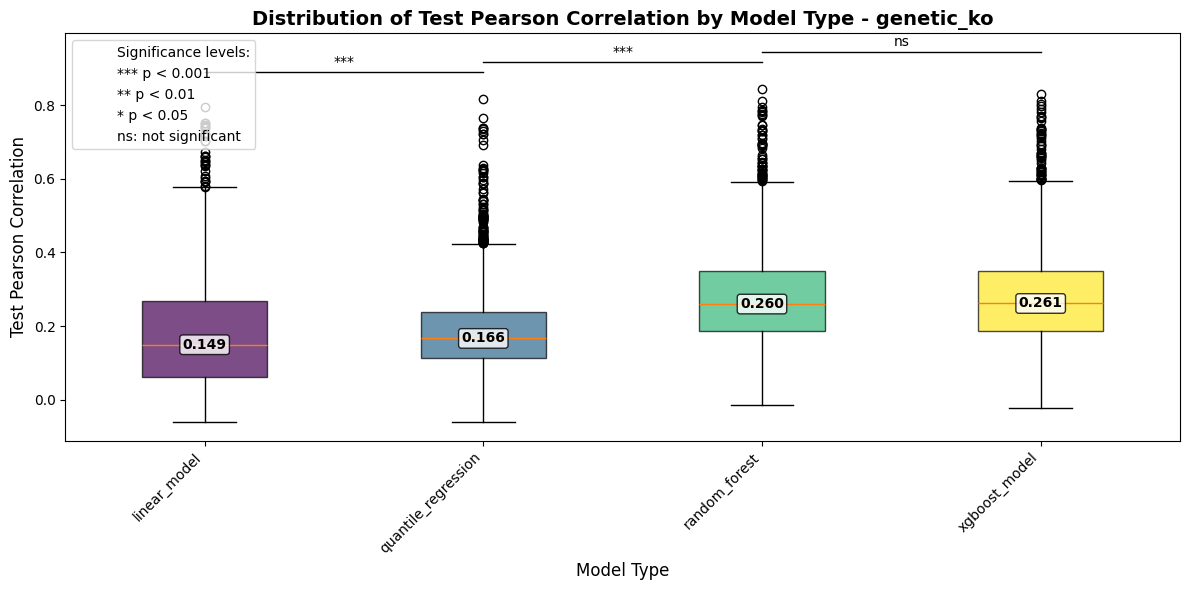


Dataset: primary
Median Test Pearson Correlation by Model Type:
--------------------------------------------------
linear_model        : -0.0024 (n=4685)
quantile_regression : 0.0325 (n=4685)
xgboost_model       : 0.0458 (n=4685)
random_forest       : 0.0475 (n=4685)

Pairwise comparisons (Mann-Whitney U test, one-tailed):
--------------------------------------------------
linear_model < quantile_regression: p = 3.4809e-86
quantile_regression < xgboost_model: p = 2.6484e-20
xgboost_model < random_forest: p = 2.6204e-01


/tmp/ipykernel_215577/3715601648.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)


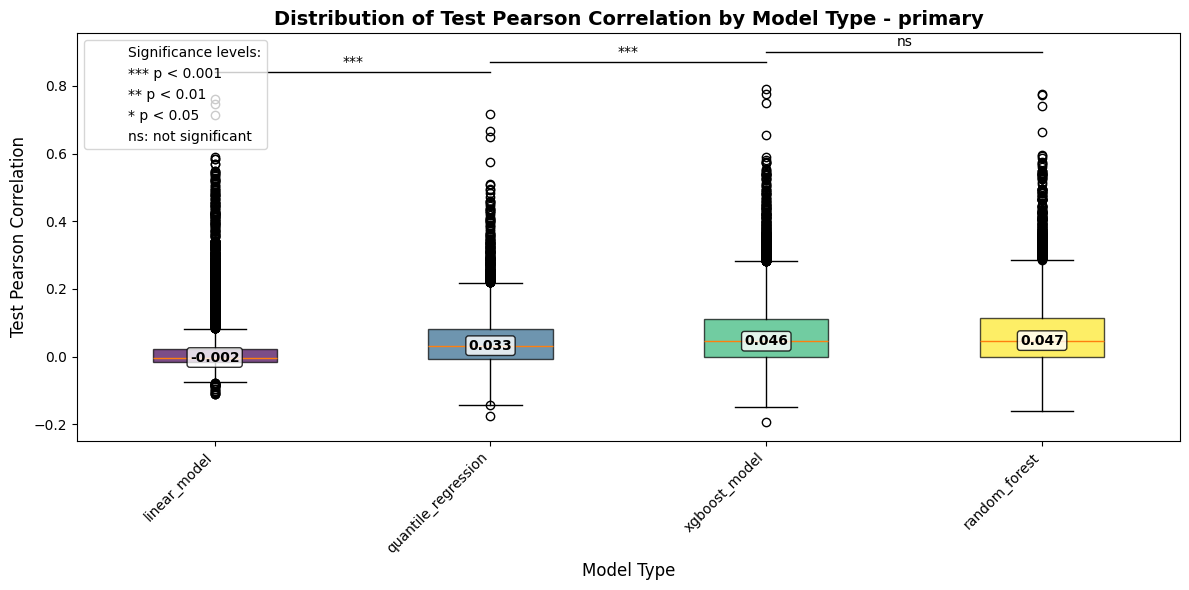


Dataset: rep1m
Median Test Pearson Correlation by Model Type:
--------------------------------------------------
linear_model        : -0.0018 (n=1590)
quantile_regression : 0.0300 (n=1590)
xgboost_model       : 0.0402 (n=1590)
random_forest       : 0.0411 (n=1590)

Pairwise comparisons (Mann-Whitney U test, one-tailed):
--------------------------------------------------
linear_model < quantile_regression: p = 1.5903e-26
quantile_regression < xgboost_model: p = 3.8300e-06
xgboost_model < random_forest: p = 2.5327e-01


/tmp/ipykernel_215577/3715601648.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)


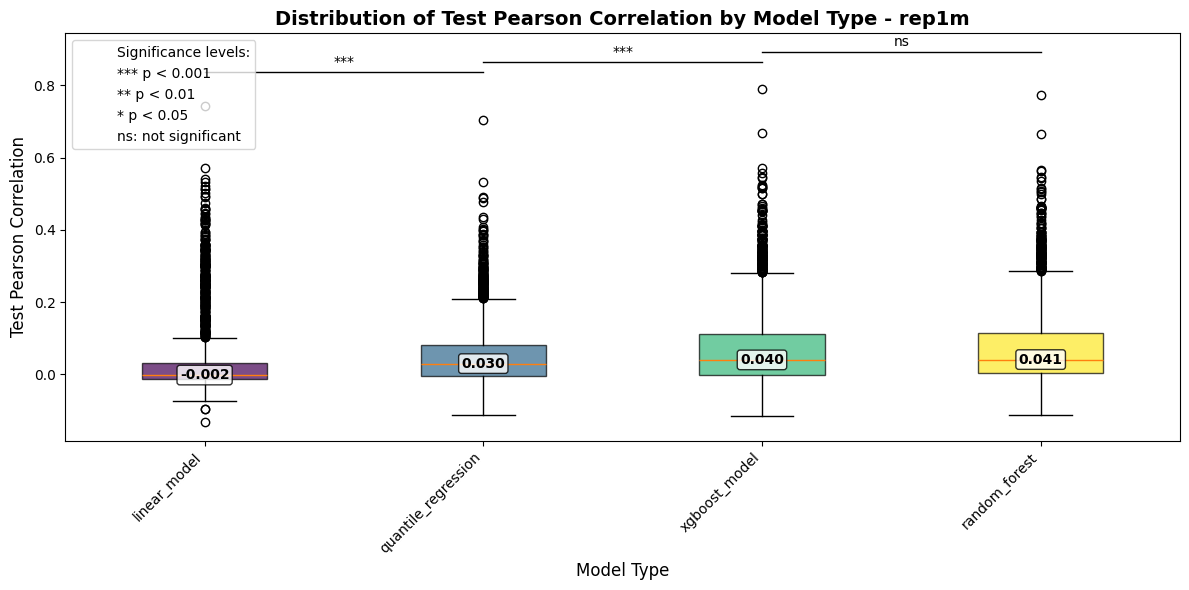


Dataset: secondary_screen
Median Test Pearson Correlation by Model Type:
--------------------------------------------------
linear_model        : 0.0084 (n=1451)
quantile_regression : 0.0631 (n=1451)
xgboost_model       : 0.0932 (n=1451)
random_forest       : 0.0975 (n=1451)

Pairwise comparisons (Mann-Whitney U test, one-tailed):
--------------------------------------------------
linear_model < quantile_regression: p = 1.7369e-46
quantile_regression < xgboost_model: p = 6.8948e-16
xgboost_model < random_forest: p = 6.7525e-02


/tmp/ipykernel_215577/3715601648.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=ordered_models, patch_artist=True)


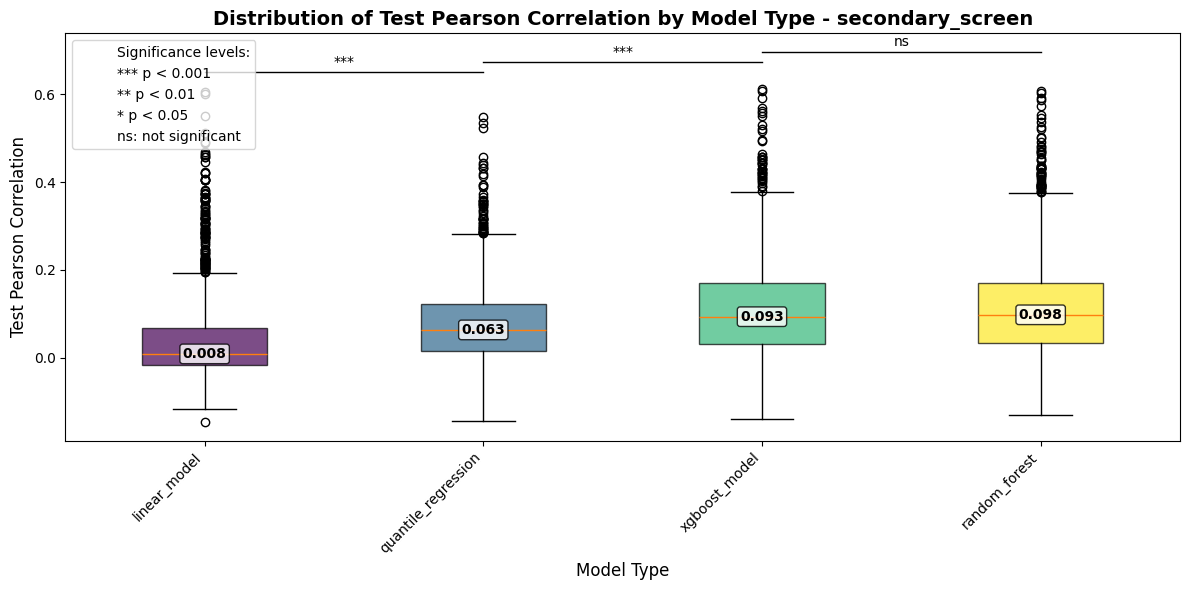

In [9]:
# Example usage: Plot for individual datasets
datasets = perf_df['dataset'].unique()

for dataset in datasets:
    print(f"\n{'='*60}")
    print(f"Dataset: {dataset}")
    print('='*60)
    fig, ax = plot_test_pearson_by_model(perf_df, figsize=(12, 6), dataset_filter=dataset)
    plt.show()


# Compare recovery of self

In [10]:
all_top_features = []
for model in model_types:
    tmp = load_feature_df("genetic_ko", model)
    # split feature on "_", make as "feat_class" and "feat_name"
    tmp["feat_class"] = tmp["feature"].str.split("_").str[0]
    tmp["feat_name"] = tmp["feature"].str.split("_").str[1]
    all_top_features.append(tmp)
all_top_features = pd.concat(all_top_features)

all_top_features.head()

100%|██████████| 2018/2018 [00:50<00:00, 40.21it/s]


,feature,importance,name,model_type,dataset,feat_class,feat_name
0,PROT_O14910,0.0,ANAPC11,linear_model,genetic_ko,PROT,O14910
1,CNA_ABR,0.0,ANAPC11,linear_model,genetic_ko,CNA,ABR
2,CNA_TLCD2,0.0,ANAPC11,linear_model,genetic_ko,CNA,TLCD2
3,CNA_MIR22,0.0,ANAPC11,linear_model,genetic_ko,CNA,MIR22
4,CNA_MIR22HG,0.0,ANAPC11,linear_model,genetic_ko,CNA,MIR22HG


In [11]:
def compute_self_recovery(df, n=10):
    """
    Compute whether the target gene appears in top n features by importance.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing feature importance data with columns:
        - importance: feature importance score
        - name: target gene name
        - feat_name: feature name
    n : int, default=10
        Number of top features to check
        
    Returns:
    --------
    int
        1 if target gene appears in top n features, 0 otherwise
    """
    # Sort by importance descending and get top n
    top_n = df.sort_values('importance', ascending=False).head(n)
    
    # Check if target gene name appears in top n features
    target_name = df['name'].iloc[0]  # All rows have same target name
    return 1 if target_name in top_n['feat_name'].values else 0

In [12]:
genes = all_top_features['name'].unique()

In [13]:
# index on model_type and name to fast query
all_top_features.set_index(["model_type", "name"], inplace=True)

In [14]:
# sort index
all_top_features.sort_index(inplace=True)

In [15]:
all_top_features.head()

feature  importance     dataset feat_class feat_name
model_type   name                                                        
linear_model AAMP   GE_EOLA2    0.013287  genetic_ko         GE     EOLA2
             AAMP   GE_HAUS7    0.013272  genetic_ko         GE     HAUS7
             AAMP   GE_RPL10    0.008426  genetic_ko         GE     RPL10
             AAMP    GE_COG8    0.007349  genetic_ko         GE      COG8
             AAMP  GE_FAM50A    0.006665  genetic_ko         GE    FAM50A

In [16]:
stats = []
for gene in tqdm(genes):
    for model in model_types:
        # get all_top_features filtered by model_type and name (indexes)
        try:
            tmp = all_top_features.loc[(model, gene)]
            tmp = tmp.reset_index()
            stats.append({
                "gene": gene,
                "model_type": model,
                "self_recovery": compute_self_recovery(tmp)
            })
        except KeyError:
            print(f"No data for {gene} and {model}")
            continue
stats = pd.DataFrame(stats)
stats.head()

  2%|▏         | 33/2018 [00:38<18:10,  1.82it/s]  

No data for ATP6V1D and random_forest


100%|██████████| 2018/2018 [00:54<00:00, 36.88it/s] 


,gene,model_type,self_recovery
0,ANAPC11,linear_model,0
1,ANAPC11,quantile_regression,0
2,ANAPC11,random_forest,0
3,ANAPC11,xgboost_model,0
4,ARHGEF7,linear_model,0


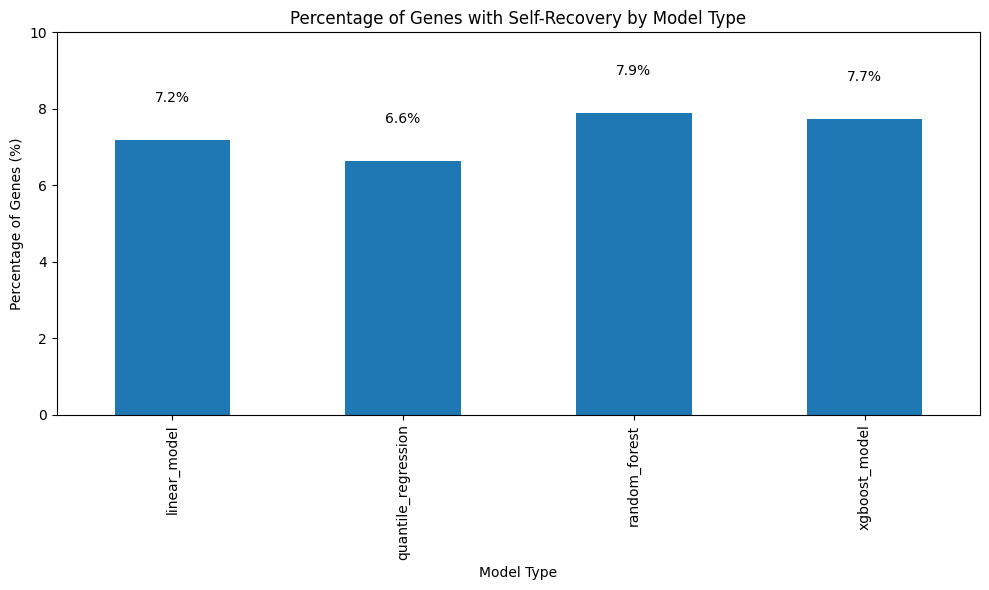

In [17]:
# Calculate percentage of genes with self_recovery == 1 for each model type
recovery_stats = stats.groupby('model_type')['self_recovery'].mean() * 100

# Create bar plot
plt.figure(figsize=(10, 6))
ax = recovery_stats.plot(kind='bar')
plt.title('Percentage of Genes with Self-Recovery by Model Type')
plt.ylabel('Percentage of Genes (%)')
plt.xlabel('Model Type')

# add some vertical space above the bars
ax.set_ylim(0, 10)

# Add value labels on top of bars
for i, v in enumerate(recovery_stats):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()
